![image.png][def]

[def]: image.png

# Лабораторна робота №1

## Тема

Метрики якості задач класифікації

## Мета

Отримати знання основних метрик якості бінарної класифікації і варіантів тонкого налаштування алгоритмів класифікації.

## Автор

Молчанов Михайло, ІА-12

## Виконання

### Завантаження дата сету

Завантажимо та переглянемо дата сет, щоб розуміти з чим ми працюємо

In [105]:
import pandas as pd

file_path = 'data/bioresponse.csv'

data = pd.read_csv(file_path)

data.iloc[:5, :5]

,Activity,D1,D2,D3,D4
0,1,0.000000,0.497009,0.10,0.0
1,1,0.366667,0.606291,0.05,0.0
2,1,0.033300,0.480124,0.00,0.0
3,1,0.000000,0.538825,0.00,0.5
4,0,0.100000,0.517794,0.00,0.0


Там було десь 1700 стовпців, і в мене все почало підвисати, тому я трохи скоротив їх до всього 5, але тут і так зрозуміло як все виглядає

### Створення моделей

Для моделювання будемо використовувати бібліотеку **Scikit-learn**, яка є однією з найпопулярніших для побудови моделей машинного навчання в Python.

Наше завдання — побудувати моделі для прогнозування значення поля **"Activity"**, яке представляє біологічну відповідь молекули. Ми будемо створювати кілька різних моделей класифікації та оцінювати їх продуктивність за допомогою різних метрик.


#### Дрібне дерево рішень

**Дрібне дерево рішень** — це модель, яка використовує дерево рішень з обмеженою глибиною для класифікації. Кожна внутрішня вузлова точка дерева задає питання на основі одного з параметрів, а листя визначають передбачуваний клас. 

Ми використовуємо обмеження на глибину дерева (`max_depth=5`), щоб уникнути перенавчання, дозволяючи дереву робити узагальнені прогнози на основі невеликої кількості питань.


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data.drop('Activity', axis=1)
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shallow_tree = DecisionTreeClassifier(max_depth=5, random_state=42)

shallow_tree.fit(X_train, y_train)

y_pred = shallow_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7762982689747004
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       318
           1       0.79      0.83      0.81       433

    accuracy                           0.78       751
   macro avg       0.77      0.77      0.77       751
weighted avg       0.78      0.78      0.78       751



#### Глибоке дерево рішень

**Глибоке дерево рішень** — це модель, яка не має обмеження на глибину і дозволяє дереву рішень розростатися до тих пір, поки воно може чітко класифікувати кожен приклад. Завдяки цьому дерево може навчитися більш детальних закономірностей у даних.

Однак, відсутність обмеження на глибину може призвести до **перенавчання** (overfitting), коли модель дуже добре працює на навчальних даних, але має низьку продуктивність на тестових даних через надмірну точність вивчених закономірностей. Для уникнення перенавчання можна використовувати регуляризацію або ансамблеві методи, як-от випадкові ліси.


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

deep_tree = DecisionTreeClassifier(random_state=42)

deep_tree.fit(X_train, y_train)

y_pred = deep_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.6990679094540613
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       318
           1       0.75      0.72      0.73       433

    accuracy                           0.70       751
   macro avg       0.69      0.69      0.69       751
weighted avg       0.70      0.70      0.70       751



#### Випадковий ліс на дрібних деревах

**Випадковий ліс** — це ансамблевий метод, який поєднує кілька дерев рішень для покращення продуктивності та зменшення ризику перенавчання. Випадковий ліс створює багато дерев рішень на різних підмножинах даних та ознак, а потім усереднює їхні прогнози.

**Випадковий ліс на дрібних деревах** використовує дерева з обмеженою глибиною (наприклад, `max_depth=5`). Таке обмеження на глибину дозволяє деревам бути більш узагальненими, уникаючи надмірної складності кожного окремого дерева. В сукупності випадковий ліс допомагає створити більш стабільну та точну модель навіть при використанні дрібних дерев.


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

shallow_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

shallow_forest.fit(X_train, y_train)

y_pred = shallow_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7603195739014648
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       318
           1       0.81      0.76      0.79       433

    accuracy                           0.76       751
   macro avg       0.76      0.76      0.76       751
weighted avg       0.76      0.76      0.76       751



#### Випадковий ліс на глибоких деревах

**Випадковий ліс на глибоких деревах** поєднує кілька глибоких дерев рішень, які не мають обмеження на глибину. Кожне дерево може навчитися складніших закономірностей, але за рахунок об'єднання великої кількості таких дерев модель зменшує ризик перенавчання.

У випадковому лісі глибокі дерева здатні краще адаптуватися до складних залежностей у даних, і завдяки агрегуванню їхніх прогнозів, результат стає більш надійним і менш схильним до помилок, ніж окремі глибокі дерева рішень.


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

deep_forest = RandomForestClassifier(n_estimators=100, random_state=42)

deep_forest.fit(X_train, y_train)

y_pred = deep_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7976031957390146
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       318
           1       0.82      0.83      0.83       433

    accuracy                           0.80       751
   macro avg       0.79      0.79      0.79       751
weighted avg       0.80      0.80      0.80       751



### Розрахунок метрик

Для оцінки якості моделей класифікації використовуються наступні метрики:

- **Частка правильних відповідей (accuracy)**: Це співвідношення кількості правильно передбачених класів до загальної кількості зразків. Використовується для загальної оцінки точності моделі, але може бути оманливою при незбалансованих класах.

- **Точність (precision)**: Відображає частку правильно передбачених позитивних результатів серед усіх передбачених позитивних. Важлива метрика, коли ми хочемо мінімізувати кількість хибнопозитивних (Type I) помилок.

- **Повнота (recall)**: Показує частку правильних позитивних передбачень серед усіх фактичних позитивних зразків. Це ключова метрика, коли ми хочемо мінімізувати хибнонегативні (Type II) помилки, важлива в задачах, де пріоритет — не пропустити позитивні випадки.

- **F1-score**: Гармонічне середнє між точністю та повнотою. Ця метрика є корисною, коли потрібен баланс між мінімізацією як хибнопозитивних, так і хибнонегативних помилок.

- **Log-loss**: Вимірює невизначеність моделі стосовно ймовірностей, що вона надає. Чим менше значення log-loss, тим краща модель. Ця метрика важлива для оцінки ймовірнісних моделей, особливо якщо потрібно враховувати не тільки передбачені класи, а й впевненість моделі.

**Пояснення:**
- **Accuracy** добре показує загальну якість, але не завжди відображає справжню ефективність при незбалансованих даних.
- **Precision** корисна, коли потрібно зменшити кількість неправильно передбачених позитивних випадків (наприклад, у медичній діагностиці).
- **Recall** важлива, коли пропущення позитивного випадку є критичним (наприклад, у виявленні шахрайства).
- **F1-score** балансує між precision та recall, корисна, коли обидві помилки (хибнопозитивні та хибнонегативні) є небажаними.
- **Log-loss** вимірює, наскільки модель впевнена у своїх передбаченнях.

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

def evaluate_model(model, X_test, y_test, threshold=0.5):
    y_prob = model.predict_proba(X_test)[:, 1]
    
    y_pred_threshold = np.where(y_prob >= threshold, 1, 0)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_threshold),
        'Precision': precision_score(y_test, y_pred_threshold),
        'Recall': recall_score(y_test, y_pred_threshold),
        'F1-Score': f1_score(y_test, y_pred_threshold),
        'Log-Loss': log_loss(y_test, y_prob)
    }
    
    return metrics

#### Дрібне дерево рішень

In [111]:
shallow_tree_metrics = evaluate_model(shallow_tree, X_test, y_test)
print("Shallow Decision Tree Metrics:")
shallow_tree_metrics


Shallow Decision Tree Metrics:


{'Accuracy': 0.7762982689747004,
 'Precision': 0.7924944812362031,
 'Recall': 0.8290993071593533,
 'F1-Score': 0.8103837471783296,
 'Log-Loss': 0.62778827762179}

Модель дрібного дерева рішень дає такі результати:

- **Accuracy (Частка правильних відповідей)**: 0.776 (~77.6%)
  - Це показує загальну точність моделі, що знаходиться на середньому рівні. Модель передбачає правильно майже 78% усіх випадків, що є гарним результатом для відносно простої моделі.

- **Precision (Точність)**: 0.792 (~79.2%)
  - Точність майже 80% означає, що з усіх передбачених моделью позитивних результатів, приблизно 79% є правильними. Це гарний показник для моделі, яка використовує просту структуру (дрібне дерево).

- **Recall (Повнота)**: 0.829 (~82.9%)
  - Повнота є досить високою, що свідчить про те, що модель добре розпізнає позитивні випадки. Модель зловлює майже 83% справжніх позитивних прикладів, що є важливим показником для уникнення помилок II роду (false negatives).

- **F1-Score**: 0.810 (~81.0%)
  - F1-score гармонічно об'єднує точність і повноту, і тут значення 81% означає, що модель збалансована в своїй здатності розпізнавати як позитивні, так і негативні випадки.

- **Log-Loss**: 0.6277
  - Значення log-loss трохи вище, що означає, що модель не завжди впевнено робить свої передбачення. Це можна покращити за допомогою більш складних моделей або налаштування моделі.

#### Глибоке дерево рішень

In [112]:
deep_tree_metrics = evaluate_model(deep_tree, X_test, y_test)
print("Deep Decision Tree Metrics:")
deep_tree_metrics

Deep Decision Tree Metrics:


{'Accuracy': 0.6990679094540613,
 'Precision': 0.747016706443914,
 'Recall': 0.7228637413394919,
 'F1-Score': 0.7347417840375586,
 'Log-Loss': 10.846691965300236}

- **Accuracy (Частка правильних відповідей)**: 0.699 (~69.9%)
  - Точність майже 70% показує, що модель не досягає високого рівня правильно передбачених відповідей. Це може свідчити про перенавчання або погану узагальненість на тестових даних.

- **Precision (Точність)**: 0.747 (~74.7%)
  - Точність означає, що близько 75% передбачених позитивних результатів є правильними. Це хороший показник, проте можливе зменшення точності через глибину дерева, яка може зловживати перенавчанням.

- **Recall (Повнота)**: 0.722 (~72.3%)
  - Повнота показує, що модель правильно виявляє близько 72% позитивних прикладів. Це непоганий результат, але нижчий порівняно з простішими моделями, що може вказувати на проблеми з узагальненням.

- **F1-Score**: 0.735 (~73.5%)
  - Гармонічне середнє між точністю та повнотою, що вказує на дещо збалансовану модель, проте загальний результат все ще не є високим.

- **Log-Loss**: 10.846
  - Дуже високий показник log-loss свідчить про те, що модель дає передбачення з низькою впевненістю. Це може бути наслідком того, що глибоке дерево рішень схильне до перенавчання і створює надто складні закономірності.

#### Випадковий ліс на дрібних деревах

In [113]:
shallow_forest_metrics = evaluate_model(shallow_forest, X_test, y_test)
print("Shallow Random Forest Metrics:")
shallow_forest_metrics


Shallow Random Forest Metrics:


{'Accuracy': 0.7603195739014648,
 'Precision': 0.8123456790123457,
 'Recall': 0.7598152424942263,
 'F1-Score': 0.7852028639618138,
 'Log-Loss': 0.5468598102912131}

- **Accuracy (Частка правильних відповідей)**: 0.760 (~76.0%)
  - Модель демонструє високу точність, передбачаючи правильно 76% випадків. Це свідчить про стабільну роботу моделі на тестовому наборі даних.

- **Precision (Точність)**: 0.812 (~81.2%)
  - Точність є досить високою, що означає, що більше 81% передбачених позитивних класів є правильними. Це вказує на низький рівень хибнопозитивних результатів.

- **Recall (Повнота)**: 0.760 (~76.0%)
  - Повнота показує, що модель правильно розпізнає 76% справжніх позитивних прикладів, що є гарним показником для виявлення позитивних класів.

- **F1-Score**: 0.785 (~78.5%)
  - F1-Score є гарним збалансованим показником між точністю та повнотою, що говорить про здатність моделі ефективно розпізнавати як позитивні, так і негативні класи.

- **Log-Loss**: 0.547
  - Низьке значення log-loss вказує на те, що модель не тільки робить правильні передбачення, але й досить впевнена у своїх відповідях, що є важливим для задач, де враховується ймовірність передбачення.

#### Випадковий ліс на глибоких деревах

In [114]:
deep_forest_metrics = evaluate_model(deep_forest, X_test, y_test)
print("Deep Random Forest Metrics:")
deep_forest_metrics


Deep Random Forest Metrics:


{'Accuracy': 0.800266311584554,
 'Precision': 0.8151447661469933,
 'Recall': 0.8452655889145496,
 'F1-Score': 0.8299319727891157,
 'Log-Loss': 0.4466838920676464}

- **Accuracy (Частка правильних відповідей)**: 0.800 (~80.0%)
  - Модель досягає точності в 80%, що свідчить про дуже добру продуктивність. Це означає, що модель правильно класифікує 80% прикладів у тестовому наборі.

- **Precision (Точність)**: 0.815 (~81.5%)
  - Висока точність означає, що модель правильно передбачає більше 81% позитивних випадків серед усіх передбачених позитивних. Це говорить про ефективність моделі в уникненні хибнопозитивних помилок.

- **Recall (Повнота)**: 0.845 (~84.5%)
  - Висока повнота свідчить про те, що модель правильно розпізнає більше 84% справжніх позитивних прикладів. Це важливо для уникнення хибнонегативних помилок.

- **F1-Score**: 0.829 (~82.9%)
  - Значення F1-score вказує на гармонічний баланс між точністю та повнотою, що робить цю модель ефективною як в мінімізації хибнопозитивних, так і хибнонегативних результатів.

- **Log-Loss**: 0.447
  - Низьке значення log-loss вказує на те, що модель робить передбачення з високою впевненістю. Це позитивний сигнал для моделі, яка працює з ймовірностями.

### Побудова Precision-Recall і ROC-кривих

**Precision-Recall (PR) крива** та **ROC (Receiver Operating Characteristic) крива** використовуються для оцінки продуктивності класифікаційних моделей, особливо в задачах з незбалансованими даними.

- **Precision-Recall крива** відображає співвідношення між точністю (precision) і повнотою (recall) для різних порогів прийняття рішення. Вона особливо корисна, коли позитивний клас є менш поширеним, тому що точність і повнота можуть змінюватися зі зміною порогів класифікації.
- **ROC-крива** відображає співвідношення між частотою хибнопозитивних (False Positive Rate) і частотою істиннопозитивних (True Positive Rate). ROC-крива корисна для розуміння загальної якості класифікатора при різних порогах, а також допомагає оцінити баланс між виявленням позитивних класів та помилковими сигналами.

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

    thresholds = np.append(thresholds, 1)

    plt.figure(figsize=(8, 6))

    plt.plot(thresholds, precision, label="Precision", color='blue')
    plt.plot(thresholds, recall, label="Recall", color='orange')

    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision and Recall vs Threshold')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


#### Precision-Recall криві

##### Shallow_tree

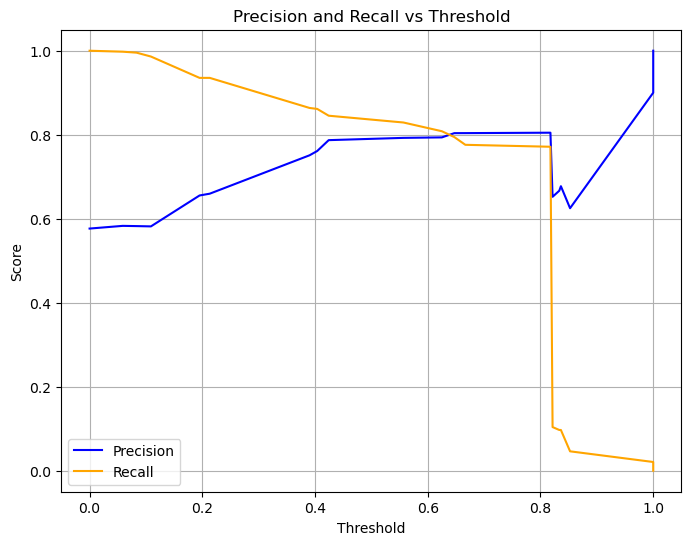

In [116]:
plot_precision_recall_vs_threshold(shallow_tree, X_test, y_test)

1. **Precision (Точність)**:
   - Значення точності зростає зі збільшенням порогу, починаючи від ~0.6 і досягаючи ~0.8 на порогах між 0.4 і 0.7.
   - При дуже високих порогах (близько 0.8), точність різко збільшується, що свідчить про те, що модель стає надзвичайно "вибагливою" до позитивних прогнозів, передбачаючи меншу кількість позитивних класів, але з більшою точністю.

2. **Recall (Повнота)**:
   - Повнота на початкових порогах залишається високою (~1.0), що означає, що модель правильно виявляє майже всі позитивні випадки.
   - Однак зі збільшенням порогу, значення recall поступово падає, особливо після порога 0.6, де спостерігається різкий спад. Це означає, що при високих порогах модель втрачає здатність розпізнавати багато позитивних випадків.

3. **Баланс між Precision і Recall**:
   - На низьких порогах модель має високий recall, але меншу точність, що означає більше хибнопозитивних результатів.
   - На середніх порогах (0.4–0.7) спостерігається відносно стабільний баланс між precision та recall, що є ознакою оптимального порогу для цієї моделі.
   - На високих порогах модель стає дуже точною (високий precision), але втрачає багато позитивних випадків (низький recall), що може бути корисним, якщо важливо уникати хибнопозитивних помилок.

Дрібне дерево рішень демонструє гарний баланс між точністю і повнотою при порогах між 0.4 і 0.7. При високих порогах модель робить точні передбачення, але втрачає велику кількість позитивних випадків, що робить її менш ефективною для задач, де важливо максимізувати recall.

##### Deep_tree

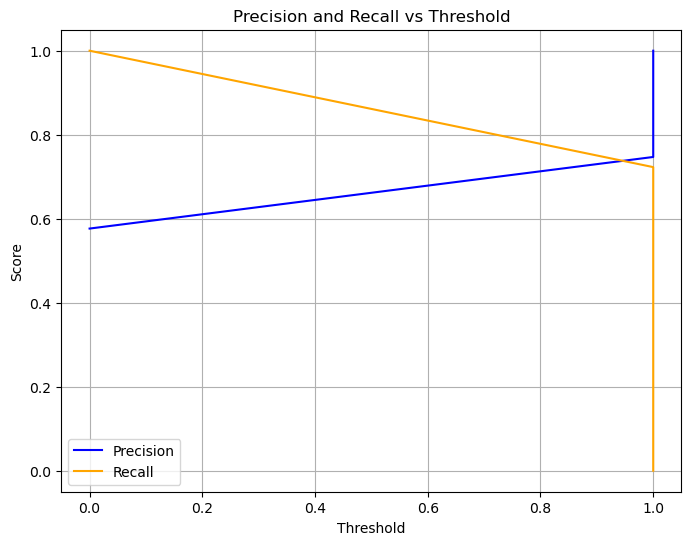

In [117]:
plot_precision_recall_vs_threshold(deep_tree, X_test, y_test)


1. **Precision (Точність)**:
   - Precision починає з низького значення (~0.6) і поступово зростає зі збільшенням порогу. Це означає, що на низьких порогах модель менш точна у своїх передбаченнях, але зі збільшенням порогу стає точнішою.
   - У міру наближення порогу до 1, точність значно покращується, оскільки модель робить менше позитивних передбачень, але вони є більш впевненими та точними.

2. **Recall (Повнота)**:
   - Recall починає з високого значення (~1.0) і поступово зменшується зі збільшенням порогу. Це означає, що модель початково виявляє більшість позитивних випадків, але зі збільшенням порогу вона починає пропускати більше позитивних прикладів.
   - При порогах ближче до 1, recall різко падає, що вказує на те, що модель втрачає багато справжніх позитивних випадків.

3. **Баланс між Precision і Recall**:
   - На низьких порогах модель має високий recall, але менш точна (низький precision), що означає більше хибнопозитивних передбачень.
   - Після порогу близько 0.5 відбувається перетин між precision і recall, що вказує на баланс між цими двома метриками.
   - При високих порогах модель стає дуже точною, але втрачає значну кількість позитивних випадків (низький recall).

Глибоке дерево рішень демонструє збалансовану роботу при порогах близько 0.5. Однак на високих порогах модель втрачає багато позитивних прикладів, тому краще уникати занадто високих порогів, якщо важливо зберегти recall на високому рівні.

##### Shallow_forest

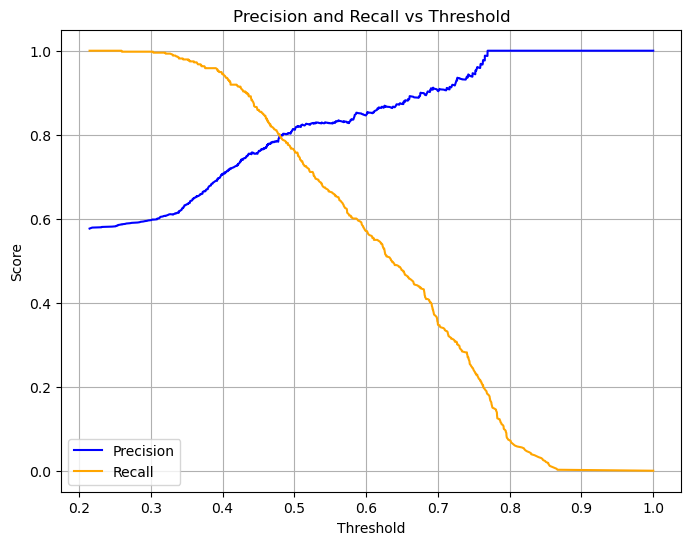

In [118]:
plot_precision_recall_vs_threshold(shallow_forest, X_test, y_test)


1. **Precision (Точність)**:
   - Точність на низьких порогах (~0.2) починає з ~0.6 і поступово зростає зі збільшенням порогу. Це означає, що модель поступово стає точнішою, коли підвищується поріг.
   - При порогах вище 0.8 точність стабілізується на рівні ~1.0, оскільки модель стає більш суворою у виборі позитивних класів, що призводить до меншої кількості хибнопозитивних прогнозів.

2. **Recall (Повнота)**:
   - Recall починається з високого значення (~1.0) на низьких порогах і стрімко знижується зі збільшенням порогу. Це означає, що модель втрачає здатність виявляти всі позитивні випадки при збільшенні порогу.
   - На порогах близько 0.5 відбувається різке падіння повноти, і при порогах вище 0.8 модель майже не виявляє позитивні випадки (recall наближається до 0).

3. **Баланс між Precision і Recall**:
   - На низьких порогах модель має високий recall, але нижчу точність, що означає, що вона виявляє більше позитивних випадків, але робить більше помилок (хибнопозитивні).
   - При порогах близько 0.5 відбувається перетин між precision і recall, що вказує на баланс між цими двома метриками.
   - На високих порогах модель дуже точна, але втрачає велику кількість позитивних випадків, що робить її менш корисною для задач, де важливим є високий recall.

Випадковий ліс на дрібних деревах демонструє гарний баланс між точністю і повнотою при порогах близько 0.5. На високих порогах точність стає дуже високою, але модель втрачає більшість позитивних випадків, що робить її менш ефективною для ситуацій, де необхідно виявити якомога більше позитивних результатів.

##### Deep_forest

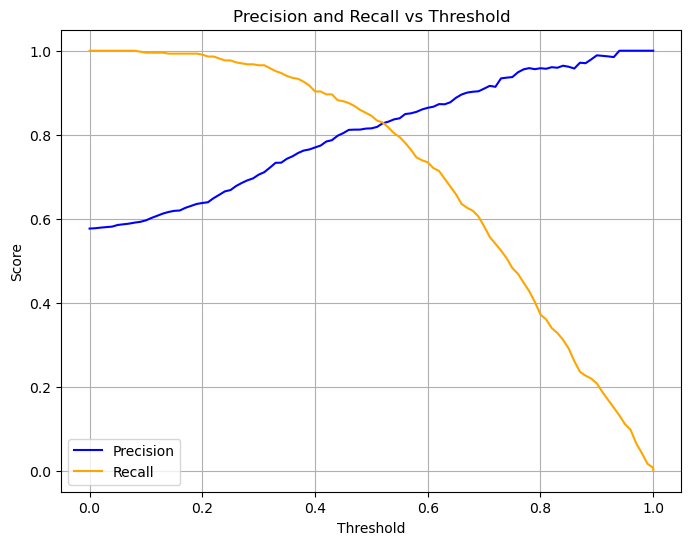

In [119]:
plot_precision_recall_vs_threshold(deep_forest, X_test, y_test)


1. **Precision (Точність)**:
   - Точність починається з досить низького значення (~0.6) на низьких порогах, але поступово зростає зі збільшенням порогу. Це вказує на те, що модель спочатку робить більше помилок при передбаченні позитивних класів, але стає точнішою, коли поріг збільшується.
   - При порогах, близьких до 1, precision досягає ~1.0, що означає, що модель стає надзвичайно точною, роблячи дуже мало хибнопозитивних передбачень.

2. **Recall (Повнота)**:
   - Recall починається з дуже високого рівня (~1.0), що означає, що модель виявляє майже всі позитивні випадки на низьких порогах.
   - Однак зі збільшенням порогу recall швидко знижується, особливо після порогу 0.5, і при високих порогах він різко падає до майже нульового значення, що вказує на втрату здатності моделі виявляти позитивні випадки.

3. **Баланс між Precision і Recall**:
   - На низьких порогах модель має високий recall, але нижчу точність, що призводить до більшої кількості хибнопозитивних результатів.
   - Після порогу близько 0.5 precision і recall перетинаються, що є ознакою балансу між цими двома метриками.
   - На високих порогах модель є дуже точною, але вона втрачає більшість позитивних випадків, що робить її менш корисною для задач, де необхідний високий рівень recall.

   - Випадковий ліс на глибоких деревах демонструє оптимальний баланс між точністю і повнотою при порогах близько 0.5. Високі пороги забезпечують високу точність, але втрачають більшість позитивних випадків, що може бути неприйнятним для задач з високими вимогами до recall.

#### ROC крива

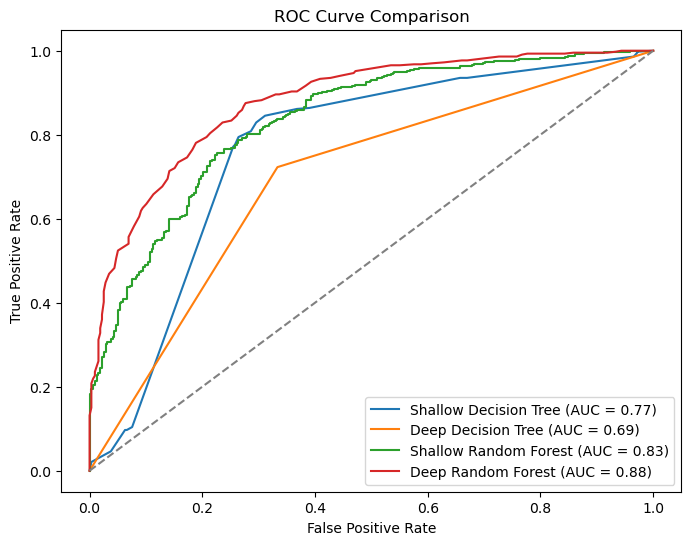

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_all_roc_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(8, 6))
    
    for i, model in enumerate(models):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='best')
    plt.show()

models = [shallow_tree, deep_tree, shallow_forest, deep_forest]
model_names = ['Shallow Decision Tree', 'Deep Decision Tree', 'Shallow Random Forest', 'Deep Random Forest']

plot_all_roc_curves(models, model_names, X_test, y_test)


ROC-крива показує, наскільки добре кожна з моделей розрізняє класи. Ось аналіз результатів:

1. **Дрібне дерево рішень (AUC = 0.77)**:
   - Дрібне дерево рішень працює досить непогано, але не є найсильнішою моделлю. Значення AUC = 0.77 вказує на прийнятну здатність відрізняти класи, але існує можливість для покращення, особливо у порівнянні з іншими моделями.

2. **Глибоке дерево рішень (AUC = 0.69)**:
   - Глибоке дерево рішень є найслабшою моделлю з AUC = 0.69. Це свідчить про те, що збільшення глибини дерева у цьому випадку призвело до перенавчання або поганої узагальнювальної здатності. Модель менш надійна у розрізненні класів, що відображається на її гіршій продуктивності на ROC-кривій.

3. **Випадковий ліс на дрібних деревах (AUC = 0.83)**:
   - Випадковий ліс на дрібних деревах показує значне покращення у порівнянні з деревами рішень. AUC = 0.83 вказує на кращу продуктивність класифікації та надійнішу здатність розрізняти класи. Це підтверджує, що використання ансамблевих методів (як випадковий ліс) покращує продуктивність моделі.

4. **Випадковий ліс на глибоких деревах (AUC = 0.88)**:
   - Випадковий ліс на глибоких деревах є найкращою моделлю з AUC = 0.88. Ця модель має найвищу здатність розрізняти позитивний та негативний класи. Поєднання глибших дерев та ансамблевого підходу надає цій моделі більшої стабільності та надійності у класифікації.

- **Перевага випадкового лісу на глибоких деревах**: Ця модель демонструє найкращі результати завдяки високому AUC, що відображає її здатність робити точніші прогнози, особливо при роботі з великим набором даних і складними ознаками.
- **Вплив глибини**: Хоча глибші дерева самі по собі не обов’язково покращують продуктивність (як видно з глибокого дерева рішень), коли їх використовують у випадковому лісі, глибші дерева призводять до кращих результатів.
- **Ансамблеві методи**: Обидві моделі випадкових лісів перевершують дерева рішень, що підтверджує ефективність ансамблевих методів, таких як випадковий ліс, у покращенні класифікації.

### Уникнення помилок 2 роду

**Помилки другого роду** (False Negative, FN) виникають, коли модель не виявляє позитивний клас і класифікує його як негативний. Іншими словами, це ситуації, коли модель пропускає істинні позитивні приклади. В задачах класифікації, такі помилки можуть бути критичними, особливо якщо пропускати позитивні випадки небажано (наприклад, у випадку виявлення хвороб або шахрайства).

In [121]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

deep_forest_recall = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 10, 1: 1})
deep_forest_recall.fit(X_train, y_train)

metrics = evaluate_model(deep_forest_recall, X_test, y_test)

metrics


{'Accuracy': 0.8069241011984021,
 'Precision': 0.8050847457627118,
 'Recall': 0.8775981524249422,
 'F1-Score': 0.8397790055248618,
 'Log-Loss': 0.4605516966309187}

Ці результати демонструють роботу моделі **випадкового лісу** з налаштованими вагами для уникнення помилок другого роду:

1. **Accuracy (Точність класифікації)**: 0.807 – Точність моделі досить висока, що означає, що приблизно 80.7% усіх передбачень моделі є правильними.

2. **Precision (Точність)**: 0.805 – Точність вказує на те, що близько 80.5% позитивних передбачень є правильними. Це показує, що модель непогано справляється з тим, щоб не класифікувати зайві негативні випадки як позитивні.

3. **Recall (Повнота)**: 0.878 – Це значення показує, що модель змогла правильно класифікувати близько 87.8% усіх справжніх позитивних прикладів. Висока повнота свідчить про те, що модель майже не пропускає позитивні випадки, що було основною метою при уникненні помилок другого роду.

4. **F1-Score**: 0.840 – Ця метрика об'єднує precision та recall і є гарним показником загальної продуктивності моделі. Вона досить висока, що свідчить про збалансовану роботу моделі між точністю та повнотою.

5. **Log-Loss**: 0.461 – Log-loss вимірює середню невизначеність моделі в передбаченнях. Низьке значення log-loss вказує на те, що модель генерує впевнені передбачення і рідко помиляється.

**Висновок**: Модель з вагами для класу 1, що збільшують чутливість до позитивних прикладів, досягла хороших результатів, зокрема, в аспекті повноти, що було нашою метою для зменшення помилок другого роду.

## Висновок

На цій лабораторній роботі я отримав знання основних метрик якості бінарної класифікації і варіантів тонкого налаштування алгоритмів класифікації.